In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market.csv')
df = df.dropna(subset=['Title'])
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN


Text(0, 0.5, 'Classification')

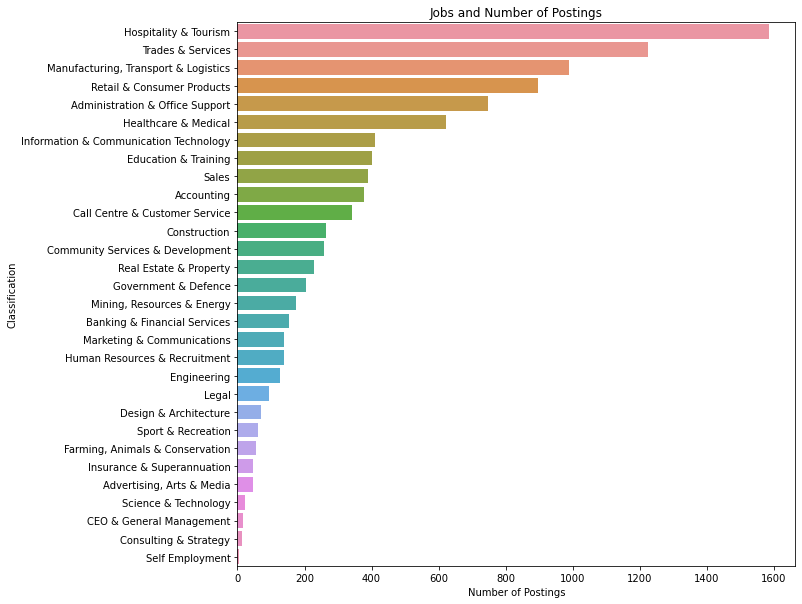

In [2]:
%matplotlib inline

by_class = df.groupby(['Classification'], as_index=False)['Id'].count().sort_values(by='Id', ascending=False)
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=by_class, x=by_class.Id, y=by_class.Classification)
plt.title("Jobs and Number of Postings")
plt.xlabel("Number of Postings")
plt.ylabel("Classification")

In [3]:
import matplotlib
by_lowSal = df.groupby(['LowestSalary'], as_index=False).count()
by_lowSal['labels'] = by_lowSal['LowestSalary']
by_lowSal.head()

,LowestSalary,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,labels
0,0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,0.0
1,30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,30.0
2,40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,40.0
3,50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,50.0


Text(0.5, 1.0, 'Job Posts by Salary Range')

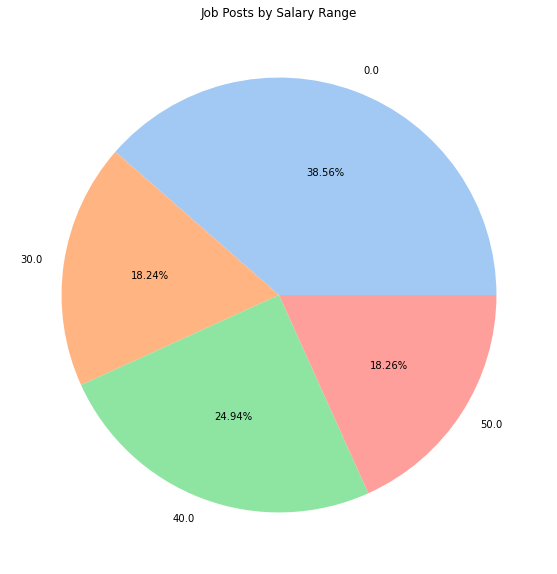

In [10]:
colors = sns.color_palette('pastel')[0:5]
fig = plt.figure(figsize=(10, 10))
plt.pie(data=by_lowSal, x=by_lowSal.Id, labels=by_lowSal.labels, colors=colors, autopct='%0.2f%%')
plt.title("Job Posts by Salary Range")

In [5]:
%matplotlib inline
matplotlib.patches.Circle(xy = (by_lowSal.Id, by_lowSal.labels))


In [6]:
%matplotlib inline
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head(10)

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19
Alice Springs & Central Australia,17,17,14,17,0,17,17,17,17,17,17,17,Alice Springs & Central Australia,17
Bairnsdale & Gippsland,18,18,17,18,0,18,18,18,18,18,18,18,Bairnsdale & Gippsland,18
Ballarat & Central Highlands,46,46,46,46,0,46,46,46,42,46,46,42,Ballarat & Central Highlands,46
"Bendigo, Goldfields & Macedon Ranges",46,46,43,46,0,46,46,46,44,46,46,44,"Bendigo, Goldfields & Macedon Ranges",46


In [7]:
#Sort by descending to have the top 5 countries at the top
locationDf = locationDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = locationDf[:5].copy()
#Add a new row that will be all of the countries under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Location' : ['others'],
                              'Count' : [locationDf['Count'][5:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
locationDf = pd.concat([df2, new_row])

Text(0.5, 1.0, 'Market share of locations')

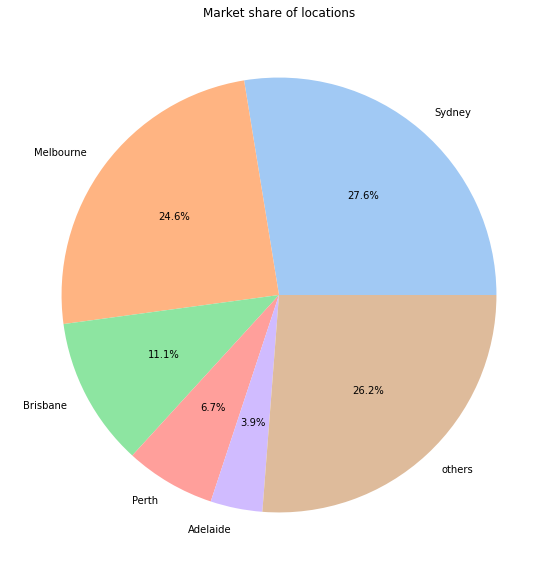

In [11]:
colors = sns.color_palette('pastel')[0:6]
fig = plt.figure(figsize=(10, 10))
plt.pie(data=locationDf, x=locationDf.Count, labels=locationDf.Location, colors=colors, autopct='%0.1f%%')
plt.title("Market share of locations")